In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df_train = pd.read_json("icecat_preprocessed_train_keybert_yake.json")
df_train.head()

Title  \
0  ASUS K31CD-IT049T PC 6th gen Intel® Core™ i7 i...   
1  C2G 1m ST/SC Plenum-Rated 9/125 Duplex Single-...   
2                                 HP FA889AA Battery   
3  Lenovo ThinkStation C30 Intel® Xeon® E5 Family...   
4            Lenovo 00D8199 software license/upgrade   

                                Description.LongDesc  \
0  <b>Smart Multimedia Performance</b><br>\nVivoP...   
1  Get the performance you demand at a price that...   
2  Keeping an extra source of power nearby means ...   
3  The C30 builds on its award-winning design as ...   
4  SUSE Linux Enterprise Server (SLES)<br>\n<br>\...   

           SummaryDescription.LongSummaryDescription  \
0  ASUS K31CD-IT049T. Processor frequency: 3.4 GH...   
1  C2G 1m ST/SC Plenum-Rated 9/125 Duplex Single-...   
2  HP FA889AA. Product type: Battery, Product col...   
3  Lenovo ThinkStation C30. Processor frequency: ...   
4   Lenovo 00D8199. License term in years: 3 year(s)   

          SummaryDescription.ShortSummaryDescription  \
0  ASUS K31CD-IT049T, 3.4 GHz, 6th gen Intel® Cor...   
1  C2G 1m ST/SC Plenum-Rated 9/125 Duplex Single-...   
2  HP FA889AA, Battery, White, Lithium-Ion (Li-Io...   
3  Lenovo ThinkStation C30, 2 GHz, Intel® Xeon® E...   
4                          Lenovo 00D8199, 3 year(s)   

                         Description.LongProductName  \
0  Intel Core i7-6700 (8M Cache, 3.4GHz), 16GB RA...   
1  1m ST/SC Plenum-Rated 9/125 Duplex Single-Mode...   
2            1100 mAh, Lithium Ion, Standard Battery   
3  Intel Xeon E5-2620 (15M Cache, 2.00 GHz, 7.20 ...   
4  SLES for SAP Applications 2 Socket 24x7 SUSE S...   

                                      pathlist_names  \
0  Computers & Electronics>Computers>PCs/Workstat...   
1  Computers & Electronics>Computer Cables>Fibre ...   
2  Computers & Electronics>Computers>Handheld Mob...   
3  Computers & Electronics>Computers>PCs/Workstat...   
4  Computers & Electronics>Software>Software Lice...   

                                            raw_text  \
0  ASUS K31CD-IT049T PC 6th gen Intel® Core™ i7 i...   
1  C2G 1m ST/SC Plenum-Rated 9/125 Duplex Single-...   
2  HP FA889AA Battery Keeping an extra source of ...   
3  Lenovo ThinkStation C30 Intel® Xeon® E5 Family...   
4  Lenovo 00D8199 software license/upgrade SUSE L...   

                                        cleaned_text  \
0  asus pc gen gb gb hdd black tower b smart mult...   
1  duplex fiber patch cable blue fiber optic cabl...   
2  hp battery keeping extra source power nearby m...   
3  lenovo thinkstation family gb gb hdd black tow...   
4  lenovo software suse linux enterprise server s...   

                                            keywords  \
0  [hardware, audio, vivopc, asus, streaming, ram...   
1  [ethernet, fiber, cable, gigabit, duplex, tran...   
2  [hp, battery, power, ipaq, office, standard, l...   
3  [lenovo, hardware, workstation, intel, process...   
4  [sap, linux, lenovo, unix, server, enterprise,...   

                                       yake_keywords  \
0  [asus, window, desktop, vivopc, faster, home, ...   
1  [cable, connector, fiber, patch, blue, duplex,...   
2  [battery, product, white, mah, keeping, extra,...   
3  [workstation, thinkstation, memory, profession...   
4  [enterprise, linux, server, suse, application,...   

                                   combined_keywords  
0  [hdmi, hdtv, asus, streaming, graphic, faster,...  
1  [bandwidth, patch, blue, cord, higher, gigabit...  
2  [nearby, product, messenger, power, office, ba...  
3  [chassis, design, technologyy, reliability, in...  
4  [sap, application, platform, year, sle, suppor...

In [3]:
df_test = pd.read_json("icecat_preprocessed_test_keybert_yake.json")
df_test.head()

Title  \
0  Fujitsu FSP:G-SW3Z560PRE0S warranty/support ex...   
1  HP Spectre x360 13-ap0023tu Blue,Silver Hybrid...   
2  HP OMEN 880-156nf 8th gen Intel® Core™ i7 i7-8...   
3  C2G 1m Cat5e Non-Booted Unshielded (UTP) Netwo...   
4       Lenovo 5PS0A14091 warranty/support extension   

                                Description.LongDesc  \
0  In times of growing complexity and decreasing ...   
1  <b>Revolutionary battery life on a convertible...   
2                                                      
3  Perfect for your home office or a large instal...   
4  Lenovo offers a comprehensive portfolio of val...   

           SummaryDescription.LongSummaryDescription  \
0  Fujitsu FSP:G-SW3Z560PRE0S. Number of years: 3...   
1  HP Spectre x360 13-ap0023tu. Product type: Hyb...   
2  HP OMEN 880-156nf. Processor frequency: 3.2 GH...   
3  C2G 1m Cat5e Non-Booted Unshielded (UTP) Netwo...   
4  Lenovo 5PS0A14091. Number of years: 3 year(s),...   

          SummaryDescription.ShortSummaryDescription  \
0         Fujitsu FSP:G-SW3Z560PRE0S, 3 year(s), 9x5   
1  HP Spectre x360 13-ap0023tu, 8th gen Intel® Co...   
2  HP OMEN 880-156nf, 3.2 GHz, 8th gen Intel® Cor...   
3  C2G 1m Cat5e Non-Booted Unshielded (UTP) Netwo...   
4  Lenovo 5PS0A14091, 3 year(s), On-site, 24x7, N...   

                         Description.LongProductName  \
0  SP 3y TS Sub & Upgr, 9x5, 4h Rm Rt f/ CS200c A...   
1  Intel® Core™ i7-8565U (1.8 GHz), 16GB DDR4-SDR...   
2                                                      
3           Cat5E Assembled UTP Patch Cable Green 1m   
4                       3YR Onsite + Keep Your Drive   

                                      pathlist_names  \
0  Computers & Electronics>Warranty & Support>War...   
1        Computers & Electronics>Computers>Notebooks   
2  Computers & Electronics>Computers>PCs/Workstat...   
3  Computers & Electronics>Computer Cables>Networ...   
4  Computers & Electronics>Warranty & Support>War...   

                                            raw_text  \
0  Fujitsu FSP:G-SW3Z560PRE0S warranty/support ex...   
1  HP Spectre x360 13-ap0023tu Blue,Silver Hybrid...   
2  HP OMEN 880-156nf 8th gen Intel® Core™ i7 i7-8...   
3  C2G 1m Cat5e Non-Booted Unshielded (UTP) Netwo...   
4  Lenovo 5PS0A14091 warranty/support extension L...   

                                        cleaned_text  \
0  fujitsu fsp extension time growing complexity ...   
1  hp spectre blue silver hybrid cm x pixel touch...   
2  hp omen gen gb gb black tower pc hp omen proce...   
3  unshielded utp network patch cable green perfe...   
4  lenovo extension lenovo offer comprehensive po...   

                                            keywords  \
0  [fujitsu, fsp, maintenance, availability, serv...   
1  [hp, ssd, hybrid, spectre, portable, pixel, pr...   
2  [hp, processor, memory, mhz, pc, gtx, ghz, sto...   
3  [cable, ethernet, network, gigabit, connector,...   
4  [lenovo, service, extension, provides, provide...   

                                       yake_keywords  \
0  [fujitsu, service, support, time, product, yea...   
1  [pixel, spectre, convertible, touchscreen, bat...   
2  [omen, gen, model, memory, graphic, super, ada...   
3  [cable, patch, network, green, utp, unshielded...   
4  [business, day, lenovo, service, warranty, par...   

                                   combined_keywords  
0  [product, advanced, comprehensive, response, f...  
1  [gb, convertible, hp, ghz, spectre, processor,...  
2  [internal, hp, super, pc, graphic, ghz, model,...  
3  [unshielded, utp, bandwidth, assembled, patch,...  
4  [product, coverage, comprehensive, repair, lab...

In [4]:
df_validate = pd.read_json("icecat_preprocessed_validate_keybert_yake.json")
df_validate.head()

Title  \
0  PanzerGlass PG1501 screen protector Clear scre...   
1     Verbatim 97537 keyboard Bluetooth QWERTY Black   
2  Symantec Backup Exec 2012 Agent f/ Windows, 1u...   
3  APC Change Mgr, 1 Year Software Maintenance Co...   
4  Urban Factory Adapter mini display port to HDM...   

                                Description.LongDesc  \
0                                                      
1  On the go, looking for a quick and easy way to...   
2  <b>Symantec Backup Exec</b><br>\nReliable wind...   
3  Provides 24x7 telephone technical support and ...   
4  The Mini DisplayPort to HDMI adapter connects ...   

           SummaryDescription.LongSummaryDescription  \
0  PanzerGlass PG1501. Type: Clear screen protect...   
1  Verbatim 97537. Connectivity technology: Wirel...   
2  Symantec Backup Exec 2012 Agent f/ Windows, 1u...   
3  APC Change Mgr, 1 Year Software Maintenance Co...   
4  Urban Factory Adapter mini display port to HDM...   

          SummaryDescription.ShortSummaryDescription  \
0  PanzerGlass PG1501, Clear screen protector, Mo...   
1  Verbatim 97537, Wireless, Bluetooth, QWERTY, B...   
2  Symantec Backup Exec 2012 Agent f/ Windows, 1u...   
3  APC Change Mgr, 1 Year Software Maintenance Co...   
4  Urban Factory Adapter mini display port to HDM...   

                         Description.LongProductName  \
0  Protective Anti Scratch Fluid Resistant Glass ...   
1  Wireless, Bluetooth, iOS 4, f/iPad/iPhone/iPod...   
2  Backup Exec 2012 Agent for Windows, 1 user, Ex...   
3  Change Mgr, 1 Year Software Maintenance Contra...   
4  Urban Factory Adapter mini display port to HDM...   

                                      pathlist_names  \
0  Computers & Electronics>Telecom & Navigation>S...   
1  Computers & Electronics>Data Input Devices>Key...   
2  Computers & Electronics>Software>Software Lice...   
3  Computers & Electronics>Warranty & Support>War...   
4  Computers & Electronics>Computer Cables>Video ...   

                                            raw_text  \
0  PanzerGlass PG1501 screen protector Clear scre...   
1  Verbatim 97537 keyboard Bluetooth QWERTY Black...   
2  Symantec Backup Exec 2012 Agent f/ Windows, 1u...   
3  APC Change Mgr, 1 Year Software Maintenance Co...   
4  Urban Factory Adapter mini display port to HDM...   

                                        cleaned_text  \
0  panzerglass screen protector clear screen prot...   
1  verbatim keyboard bluetooth qwerty black go lo...   
2  symantec backup exec agent window initial e rn...   
3  apc change mgr year software maintenance contr...   
4  urban factory adapter mini display port hdmi m...   

                                            keywords  \
0  [panzerglass, protector, samsung, shield, glas...   
1  [keyboard, bluetooth, qwerty, wireless, iphone...   
2  [symantec, backup, software, protects, license...   
3  [apc, maintenance, contract, software, change,...   
4  [adapter, connector, displayport, hdmi, port, ...   

                                       yake_keywords  \
0  [screen, protector, galaxy, samsung, clear, mo...   
1  [case, keyboard, carrying, bluetooth, maximum,...   
2  [exec, agent, backup, window, eng, initial, fi...   
3  [mgr, maintenance, software, contract, year, c...   
4  [port, display, mini, hdmi, adapter, factory, ...   

                                   combined_keywords  
0  [clear, tab, compatibility, mobile, protector,...  
1  [design, case, carrying, mobile, keyboard, dev...  
2  [rnw, renewal, integrated, protected, initial,...  
3  [change, apc, device, year, support, update, m...  
4  [hdmi, mac, white, macbook, displayport, conne...

In [5]:
from sentence_transformers import SentenceTransformer
import pickle

In [6]:
all_keywords = (
    df_train["combined_keywords"].explode()
    .append(df_validate["combined_keywords"].explode())
    .append(df_test["combined_keywords"].explode())
)


C:\Users\Amroy\AppData\Local\Temp\ipykernel_27760\1657697663.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df_validate["combined_keywords"].explode())
C:\Users\Amroy\AppData\Local\Temp\ipykernel_27760\1657697663.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df_test["combined_keywords"].explode())


In [7]:
unique_keywords = all_keywords.dropna().unique().tolist() #clean the list

In [8]:
model = SentenceTransformer("all-MiniLM-L6-v2")
keyword_embeddings = model.encode(unique_keywords, show_progress_bar=True)

Batches:   0%|          | 0/648 [00:00<?, ?it/s]

In [9]:
keyword_to_embedding = dict(zip(unique_keywords, keyword_embeddings))

In [10]:
keyword_to_embedding

{'hdmi': array([-1.09980265e-02, -7.24507123e-02, -8.57872702e-03, -6.54969439e-02,
         4.41978909e-02, -1.66501217e-02, -5.67775499e-03,  1.54706109e-02,
         4.48406078e-02,  1.26741026e-02,  3.29357497e-02, -2.52046436e-02,
         4.62648459e-03,  2.95821838e-02, -8.94813165e-02, -2.33495198e-02,
         2.40487121e-02, -5.56479841e-02, -5.00397868e-02, -4.70817685e-02,
        -2.80745924e-02, -3.37598696e-02, -1.15217485e-01, -2.82847881e-02,
         3.58542427e-02,  3.23533155e-02,  3.14786248e-02,  7.58393630e-02,
        -1.24180503e-02, -4.05169390e-02, -2.54376717e-02, -4.39477377e-02,
         9.75615829e-02,  5.03193699e-02, -9.47491676e-02, -3.80295888e-02,
         5.68075925e-02, -7.85330981e-02, -6.47242516e-02, -1.08060338e-01,
         9.67383105e-03, -7.52487704e-02,  4.55730082e-03, -5.93813211e-02,
         2.61495598e-02, -3.65025550e-02,  4.76624295e-02, -3.09457351e-02,
         1.80957243e-02,  1.45672597e-02, -3.79352719e-02,  1.51159812e-03,
    

In [11]:
with open("keyword_to_embedding.pkl", "wb") as f:
    pickle.dump(keyword_to_embedding, f)

Apply Clustering

In [14]:
import hdbscan

In [15]:
with open("keyword_to_embedding.pkl", "rb") as f:
    keyword_to_embedding = pickle.load(f)

In [16]:
keywords = list(keyword_to_embedding.keys())
embeddings = np.array([keyword_to_embedding[k] for k in keywords])

In [17]:
embeddings

array([[-0.01099803, -0.07245071, -0.00857873, ...,  0.0796101 ,
         0.01513766,  0.05596122],
       [ 0.01066973, -0.07679497, -0.00033538, ...,  0.04029713,
        -0.02052481,  0.02258728],
       [-0.09204946, -0.0037919 , -0.0680238 , ...,  0.02424304,
        -0.03748197,  0.02937597],
       ...,
       [-0.07834917,  0.06597368,  0.04374453, ..., -0.04651349,
        -0.00926483, -0.00735406],
       [ 0.00105238, -0.01824111,  0.03443754, ..., -0.01581736,
         0.06485248, -0.03156007],
       [-0.06930764,  0.00823075, -0.02825581, ..., -0.04454896,
        -0.0213052 ,  0.1071741 ]], dtype=float32)

In [18]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
labels = clusterer.fit_predict(embeddings)

In [19]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
keyword_cluster_map = dict(zip(keywords, labels))

In [21]:
keyword_cluster_map

{'hdmi': 0,
 'hdtv': 0,
 'asus': 0,
 'streaming': 0,
 'graphic': 0,
 'faster': 0,
 'vivopc': 0,
 'multimedia': 0,
 'audio': 0,
 'time': 0,
 'processor': 0,
 'home': 0,
 'desktop': 0,
 'window': 0,
 'hardware': 0,
 'usb': 0,
 'ram': 0,
 'bandwidth': 0,
 'patch': 0,
 'blue': 0,
 'cord': 0,
 'higher': 0,
 'gigabit': 0,
 'transmission': 0,
 'connector': 0,
 'male': 0,
 'cable': 0,
 'fiber': 0,
 'duplex': 0,
 'network': 0,
 'jacket': 0,
 'ethernet': 0,
 'nearby': 0,
 'product': 0,
 'messenger': 0,
 'power': 0,
 'office': 0,
 'battery': 0,
 'hp': 0,
 'white': 0,
 'keeping': 0,
 'lithium': 0,
 'standard': 0,
 'ipaq': 0,
 'extra': 0,
 'mah': 0,
 'source': -1,
 'voice': 0,
 'chassis': 0,
 'design': 0,
 'technologyy': 0,
 'reliability': 0,
 'intel': 0,
 'workstation': 0,
 'ecc': 0,
 'professional': 0,
 'memory': 0,
 'performance': 0,
 'lenovo': 0,
 'type': 0,
 'thinkstation': 0,
 'family': 0,
 'sap': 0,
 'application': 0,
 'platform': 0,
 'year': 0,
 'sle': 0,
 'support': 0,
 'suse': 0,
 'unix':

In [22]:
cluster_df = pd.DataFrame({
    "keyword": keywords,
    "cluster_id": labels
})
cluster_df

keyword  cluster_id
0             hdmi           0
1             hdtv           0
2             asus           0
3        streaming           0
4          graphic           0
...            ...         ...
20703  farbvolumen          -1
20704         stnd           0
20705          dri           0
20706       piéton           0
20707        optez           0

[20708 rows x 2 columns]

In [23]:
cluster_df.to_csv("keyword_clusters_hdbscan.csv", index=False)

In [26]:
cluster_df['cluster_id'].value_counts()

 0    19779
-1      921
 1        8
Name: cluster_id, dtype: int64

Apply ALL 4 Algorithms for Comparision

In [28]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [30]:
#Load saved embeddings
with open("keyword_to_embedding.pkl", "rb") as f:
    keyword_to_embedding = pickle.load(f)

In [31]:
# Prepare data
X = np.array(list(keyword_to_embedding.values()))
keywords = list(keyword_to_embedding.keys())

In [32]:
# --- KMeans ---
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [33]:
# --- DBSCAN ---
dbscan = DBSCAN(eps=0.4, min_samples=3, metric='cosine')
dbscan_labels = dbscan.fit_predict(X)


In [35]:
# --- Hierarchical Clustering (Agglomerative) ---
hclust = AgglomerativeClustering(n_clusters=10, metric='cosine', linkage='average')
hclust_labels = hclust.fit_predict(X)

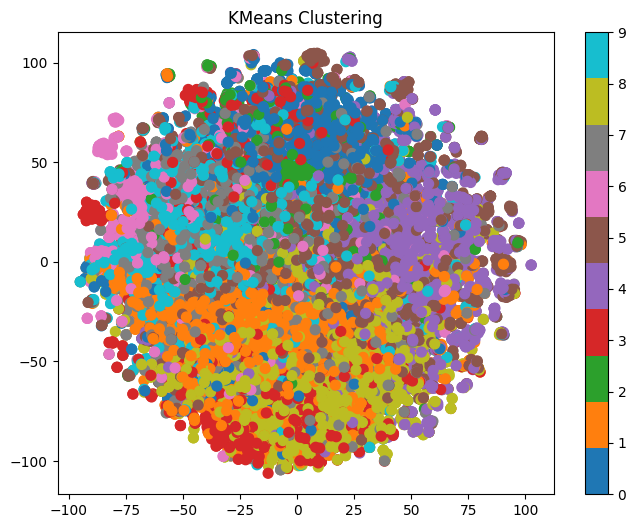

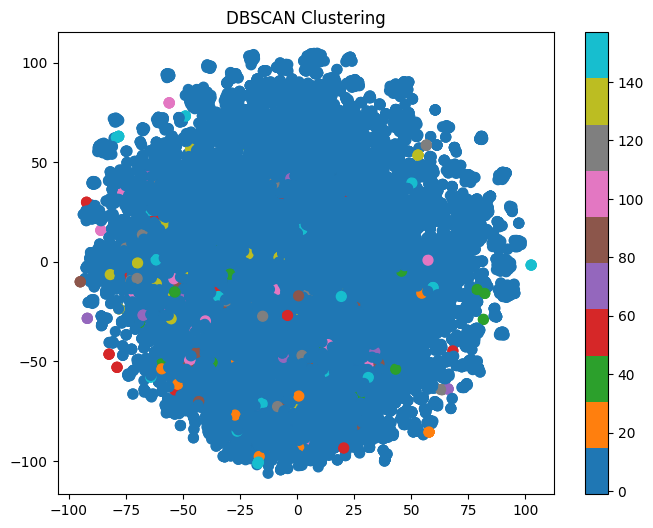

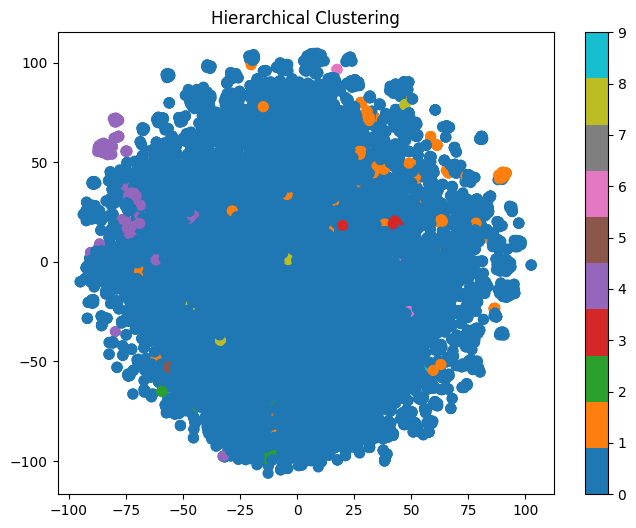

In [37]:
 #--- Visualization using t-SNE ---
from sklearn.manifold import TSNE
def plot_clusters(X, labels, title):
    X_2d = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=50)
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

plot_clusters(X, kmeans_labels, "KMeans Clustering")
plot_clusters(X, dbscan_labels, "DBSCAN Clustering")
plot_clusters(X, hclust_labels, "Hierarchical Clustering")